# 6.5: Unsupervised Machine Learning: Clustering

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

## 1. Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'E:\E-commerce Cosmetic Products'

In [4]:
# Import the data

df= pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cosmetic_clean.csv'))

#### Data Cleaning

In [5]:
df.columns

Index(['Unnamed: 0', 'website', 'country', 'category', 'subcategory', 'price',
       'brand', 'form', 'type', 'rating', 'count of ratings'],
      dtype='object')

In [6]:
df=df.drop(columns=['Unnamed: 0'])

In [7]:
df.shape

(12615, 10)

In [8]:
df.head(10)

,website,country,category,subcategory,price,brand,form,type,rating,count of ratings
0,Flipkart,India,body,perfume,599.0,Carlton London,aerosol,all,3.9,19
1,Flipkart,India,body,perfume,149.0,Charlene,aerosol,all,4.4,4031
2,Flipkart,India,body,perfume,298.0,Charlene,aerosol,all,4.4,4072
3,Flipkart,India,body,perfume,245.0,Denver,aerosol,all,4.2,61
4,Flipkart,India,body,perfume,422.0,Denver,aerosol,all,4.3,342
5,Flipkart,India,body,perfume,422.0,Engage,aerosol,all,4.4,13101
6,Flipkart,India,body,perfume,422.0,Engage,aerosol,all,4.3,515
7,Flipkart,India,body,perfume,422.0,Engage,aerosol,all,4.5,9665
8,Flipkart,India,body,perfume,422.0,Engage,aerosol,all,4.3,54
9,Flipkart,India,body,perfume,236.0,Envy,aerosol,all,4.2,842


In [9]:
# Price unit is in INR and must convert to dollor, ith considerin 1 INR=0.012 $
# Convert 'Price' from INR to USD
df['price'] = df['price'] * 0.012

In [10]:
df.head()

,website,country,category,subcategory,price,brand,form,type,rating,count of ratings
0,Flipkart,India,body,perfume,7.188,Carlton London,aerosol,all,3.9,19
1,Flipkart,India,body,perfume,1.788,Charlene,aerosol,all,4.4,4031
2,Flipkart,India,body,perfume,3.576,Charlene,aerosol,all,4.4,4072
3,Flipkart,India,body,perfume,2.940,Denver,aerosol,all,4.2,61
4,Flipkart,India,body,perfume,5.064,Denver,aerosol,all,4.3,342


In [11]:
# Standardize website names
# Replace 'sephora' with 'Sephora' in the 'website' column
df['website'] = df['website'].replace('sephora', 'Sephora')

# Check the unique values in the 'website' column to confirm the change
print(df['website'].unique())


['Flipkart' 'ulta' 'Sephora' 'Amazon']


## 2. The elbow technique

In [12]:
# Remove categorical columns
df_numeric = df.select_dtypes(include=[np.number])

In [13]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [14]:
num_cl= range(1,10)
kmeans=[KMeans(n_clusters=i) for i in num_cl]

In [15]:
score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\negar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\negar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\negar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\negar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\negar\anaconda3\Lib\site-packages\sklearn\clust

[-37845.0,
 -29755.507132751784,
 -22605.45470464108,
 -16239.305051417843,
 -13303.01263804249,
 -10919.266260732973,
 -8662.75648320956,
 -7559.731795770002,
 -6500.624579756295]

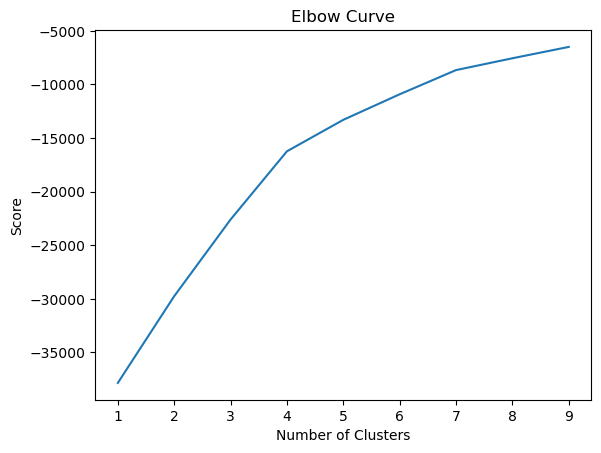

In [16]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### I chose 7 clusters because the inertia starts to decrease at a slower rate after 6, indicating an optimal balance between minimizing inertia and avoiding overfitting.


## 3. k-means clustering¶

In [17]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 7) 


In [18]:
# Fit the k-means object to the data.

kmeans.fit(df_scaled)

C:\Users\negar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7)

In [19]:
df['Cluster'] = kmeans.fit_predict(df_scaled)


C:\Users\negar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [20]:
df.head

<bound method NDFrame.head of         website country category subcategory   price            brand  \
0      Flipkart   India     body     perfume   7.188   Carlton London   
1      Flipkart   India     body     perfume   1.788         Charlene   
2      Flipkart   India     body     perfume   3.576         Charlene   
3      Flipkart   India     body     perfume   2.940           Denver   
4      Flipkart   India     body     perfume   5.064           Denver   
...         ...     ...      ...         ...     ...              ...   
12610   Sephora   India     face   concealer  22.800    MAC Cosmetics   
12611   Sephora   India     face   concealer  25.800    MAC Cosmetics   
12612   Sephora   India     face       blush  36.480  Klara Cosmetics   
12613   Sephora   India     face       blush  35.400         CLINIQUE   
12614   Sephora   India     face       blush  70.200           Lancme   

          form                            type  rating  count of ratings  \
0      aerosol   

In [21]:
df['Cluster'].value_counts()

Cluster
0    5417
4    4147
2    1547
5    1319
6     155
1      16
3      14
Name: count, dtype: int64

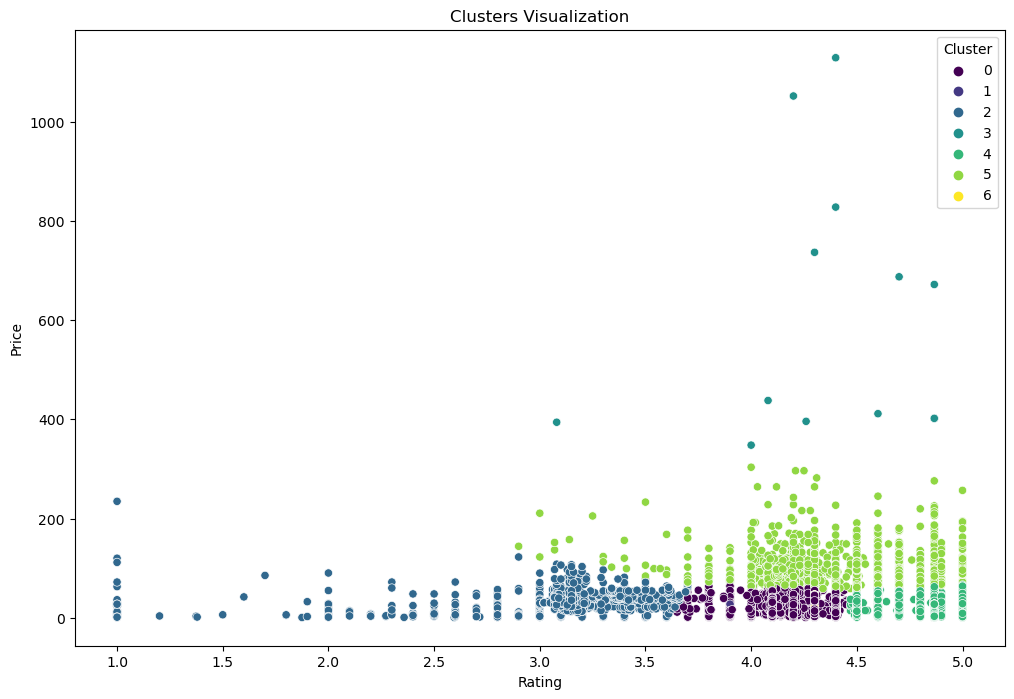

In [22]:
# scatter plot visualization
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df['rating'], y=df['price'], hue=df['Cluster'], palette='viridis')
plt.title('Clusters Visualization')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.legend(title='Cluster')
# save the plot
plt.savefig('clusters-visualization.png')
plt.show()

#### The clusters make sense as they separate the data points based on similarities in rating and price. Cluster 4 and 5 represent products with high ratings but 2 differen price category:High and also low Price


In [23]:
df.loc[df['Cluster'] == 6, 'Cluster'] = 'yellow'
df.loc[df['Cluster'] == 5, 'Cluster'] = 'green'
df.loc[df['Cluster'] == 4, 'Cluster'] = 'cyan'
df.loc[df['Cluster'] == 3, 'Cluster'] = 'blue'
df.loc[df['Cluster'] == 2, 'Cluster'] = 'dark blue'
df.loc[df['Cluster'] == 1, 'Cluster'] = 'purple'
df.loc[df['Cluster'] == 0, 'Cluster'] = 'dark purple'

C:\Users\negar\AppData\Local\Temp\ipykernel_3752\3721974386.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'yellow' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[df['Cluster'] == 6, 'Cluster'] = 'yellow'


In [24]:
df.groupby('Cluster').agg({'rating':['mean', 'median'], 
                         'count of ratings':['mean', 'median'], 
                         'price':['mean', 'median']})

rating           count of ratings                 price  \
                 mean    median             mean    median        mean   
Cluster                                                                  
blue         4.391855  4.400000       175.142857      16.5  592.796391   
cyan         4.776217  4.866494       425.093803       4.0   16.117382   
dark blue    3.166129  3.280000        91.318681      18.0   24.757605   
dark purple  4.132104  4.140000       655.634669      46.0   18.152583   
green        4.403147  4.400000       458.288855      31.0   99.750440   
purple       4.375000  4.400000    147575.250000  118772.0    7.746886   
yellow       4.359119  4.400000     26605.077419   21515.0   11.999337   

                        
                median  
Cluster                 
blue         424.73400  
cyan          10.29672  
dark blue     23.10000  
dark purple   14.40000  
green         92.40000  
purple         5.38800  
yellow         6.58800

In [25]:
# Find the cluster with the highest median and mean ratings:
highest_median_cluster = df.groupby('Cluster')['rating'].median().idxmax()
highest_mean_cluster = df.groupby('Cluster')['rating'].mean().idxmax()

print(f"Cluster with highest median rating: {highest_median_cluster}")
print(f"Cluster with highest mean rating: {highest_mean_cluster}")

Cluster with highest median rating: cyan
Cluster with highest mean rating: cyan


### Investigate Cluster Distribution by Price

C:\Users\negar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Mean price distribution for cluster with highest median rating: 16.11738196729925


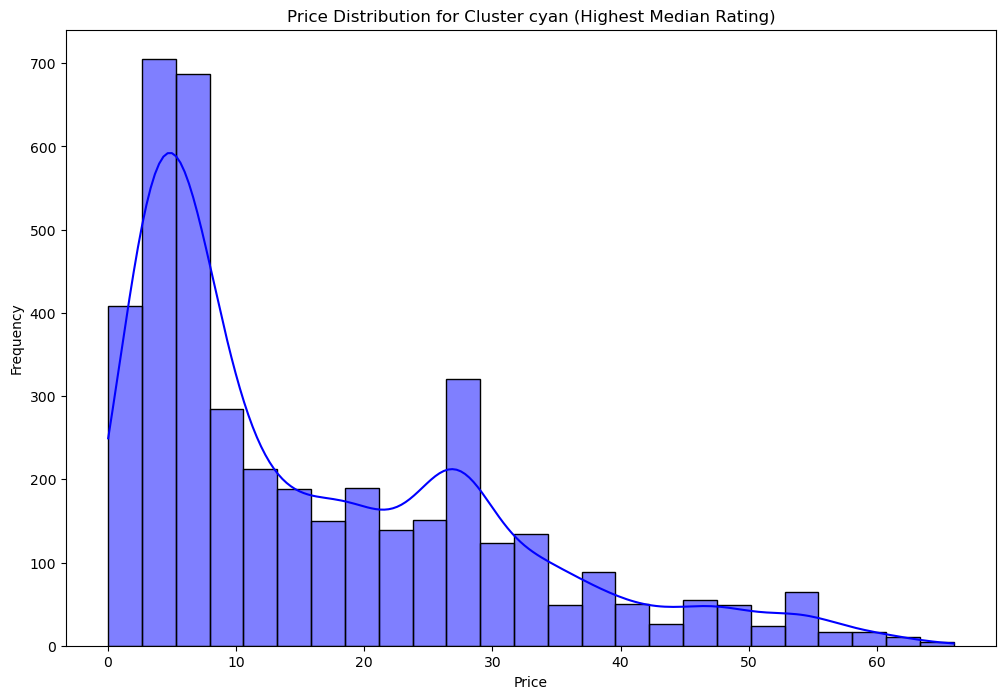

In [26]:
#Filter the DataFrame for this cluster
highest_median_cluster_data = df[df['Cluster'] == highest_median_cluster]

# Analyze the mean price distribution
mean_price_distribution = highest_median_cluster_data['price'].mean()


print(f"Mean price distribution for cluster with highest median rating: {mean_price_distribution}")

# Visualize the price distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.histplot(highest_median_cluster_data['price'], kde=True, color='blue')
plt.title(f'Price Distribution for Cluster {highest_median_cluster} (Highest Median Rating)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.savefig('price_distribution_highest_median_cluster.png')
plt.show()

### Investigate Cluster Distribution by Category

In [27]:
# Group the data by Cluster and Category to see the distribution.
category_distribution = df.groupby(['Cluster', 'category']).size().unstack().fillna(0)
print(category_distribution)

category      body    eyes   face    hair    lips  skincare
Cluster                                                    
blue           3.0     2.0    2.0     4.0     1.0       2.0
cyan         763.0   606.0  385.0  1162.0   596.0     635.0
dark blue    102.0   306.0  816.0    28.0   263.0      32.0
dark purple  902.0  1215.0  344.0   279.0  1549.0    1128.0
green        720.0   278.0   23.0     8.0    30.0     260.0
purple        13.0     0.0    1.0     0.0     0.0       2.0
yellow        52.0    18.0    8.0    20.0    39.0      18.0


In [28]:
top_categories = df.groupby(['Cluster', 'category']).size().groupby(level=0, group_keys=False).nlargest(3).reset_index(name='count')
print(top_categories)

        Cluster  category  count
0          blue      hair      4
1          blue      body      3
2          blue      eyes      2
3          cyan      hair   1162
4          cyan      body    763
5          cyan  skincare    635
6     dark blue      face    816
7     dark blue      eyes    306
8     dark blue      lips    263
9   dark purple      lips   1549
10  dark purple      eyes   1215
11  dark purple  skincare   1128
12        green      body    720
13        green      eyes    278
14        green  skincare    260
15       purple      body     13
16       purple  skincare      2
17       purple      face      1
18       yellow      body     52
19       yellow      lips     39
20       yellow      hair     20


In [29]:
#Filter the DataFrame for the cluster with the highest median rating and analyze the category distribution
high_median_cluster_data = df[df['Cluster'] == highest_median_cluster]
category_distribution_median = high_median_cluster_data['category'].value_counts()
print("Category distribution for cluster with highest median rating:")
print(category_distribution_median)

Category distribution for cluster with highest median rating:
category
hair        1162
body         763
skincare     635
eyes         606
lips         596
face         385
Name: count, dtype: int64


In [30]:
#Repeat the same for the cluster with the highest mean rating
high_mean_cluster_data = df[df['Cluster'] == highest_mean_cluster]
category_distribution_mean = high_mean_cluster_data['category'].value_counts()
print("Category distribution for cluster with highest mean rating:")
print(category_distribution_mean)


Category distribution for cluster with highest mean rating:
category
hair        1162
body         763
skincare     635
eyes         606
lips         596
face         385
Name: count, dtype: int64


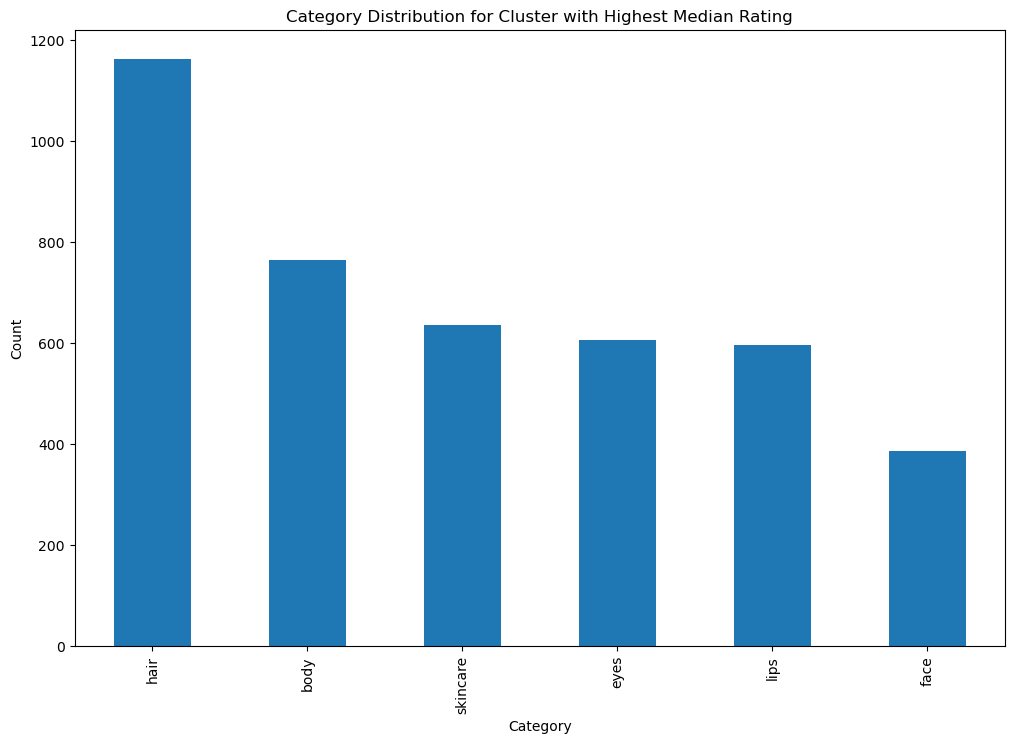

In [31]:
# Median Rating
category_distribution_median.plot(kind='bar', figsize=(12, 8))
plt.title('Category Distribution for Cluster with Highest Median Rating')
plt.xlabel('Category')
plt.ylabel('Count')
plt.savefig('Category-Distribution-for-Cluster-with-Highest-Median-Rating.png')
plt.show()

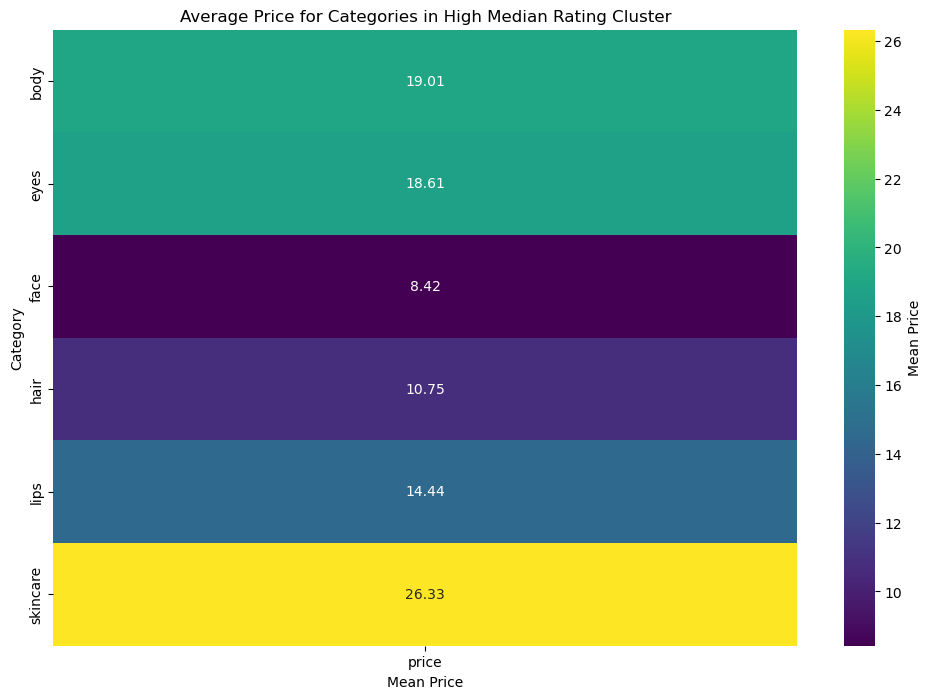

In [32]:
#Calculate the mean price for each category within this cluster
category_mean_prices = highest_median_cluster_data.groupby('category')['price'].mean().reset_index()

# Create a heat map with the categories and their mean prices
plt.figure(figsize=(12, 8))

# Create the heatmap
category_mean_prices_pivot = category_mean_prices.pivot_table(index='category', values='price')
sns.heatmap(category_mean_prices_pivot, annot=True, fmt=".2f", cmap='viridis', cbar_kws={'label': 'Mean Price'})
plt.title('Average Price for Categories in High Median Rating Cluster')
plt.xlabel('Mean Price')
plt.ylabel('Category')

# Optionally, save the plot
plt.savefig('category_mean_price_heatmap.png')

plt.show()

### Investigate Cluster Distribution by Brand

In [33]:
# Group the data by Cluster and Brand to see the distribution.

brand_distribution = df.groupby(['Cluster', 'brand']).size().unstack().fillna(0)
print(brand_distribution)

brand        100% PURE  1000Hour  18.21 Man Made  3CE  7 DAYS  7 Days  \
Cluster                                                                 
blue               0.0       0.0             0.0  0.0     0.0     0.0   
cyan               0.0       0.0             1.0  0.0     4.0     0.0   
dark blue          0.0       0.0             0.0  1.0     2.0     0.0   
dark purple        0.0       0.0             0.0  0.0     0.0    14.0   
green              1.0       1.0             0.0  0.0     0.0     0.0   
purple             0.0       0.0             0.0  0.0     0.0     0.0   
yellow             0.0       0.0             0.0  0.0     0.0     0.0   

brand        7th Heaven  A'PIEU  ABHATi SUISSE  ACO perfumes  ...  panchvati  \
Cluster                                                       ...              
blue                0.0     0.0            0.0           0.0  ...        0.0   
cyan                1.0     0.0            1.0           0.0  ...        1.0   
dark blue           0.

In [34]:
top_brands = df.groupby(['Cluster', 'brand']).size().groupby(level=0, group_keys=False).nlargest(3).reset_index(name='count')
print(top_brands)

        Cluster                    brand  count
0          blue                   Lancme      3
1          blue                   CHANEL      2
2          blue          Clive Christian      2
3          cyan                  KAIASHA     74
4          cyan                    Wiffy     72
5          cyan                  Generic     69
6     dark blue            MAC Cosmetics     75
7     dark blue       Sephora Collection     67
8     dark blue                Too Faced     63
9   dark purple       Sephora Collection    382
10  dark purple             SWISS BEAUTY    104
11  dark purple  Anastasia Beverly Hills     94
12        green                     Dior     68
13        green                   CHANEL     47
14        green                 TOM FORD     32
15       purple                  Santoor      3
16       purple                    Pears      2
17       purple             Calvin Klein      1
18       yellow               Maybelline     25
19       yellow  Nyx Professional Makeup

In [35]:
#Filter the DataFrame for the cluster with the highest median rating and analyze the brand distribution
brand_distribution_median = high_median_cluster_data['brand'].value_counts()
print("Brand distribution for cluster with highest median rating:")
print(brand_distribution_median)

Brand distribution for cluster with highest median rating:
brand
KAIASHA               74
Wiffy                 72
Generic               69
Clinique              58
WOW Skin Science      43
                      ..
BabyChakra             1
Bajaj Almond Drops     1
BARBA                  1
Biosilk                1
Dear Dahlia            1
Name: count, Length: 1154, dtype: int64


In [36]:
#Repeat the same for the cluster with the highest mean rating:

brand_distribution_mean = high_mean_cluster_data['brand'].value_counts()
print("Brand distribution for cluster with highest mean rating:")
print(brand_distribution_mean)

Brand distribution for cluster with highest mean rating:
brand
KAIASHA               74
Wiffy                 72
Generic               69
Clinique              58
WOW Skin Science      43
                      ..
BabyChakra             1
Bajaj Almond Drops     1
BARBA                  1
Biosilk                1
Dear Dahlia            1
Name: count, Length: 1154, dtype: int64


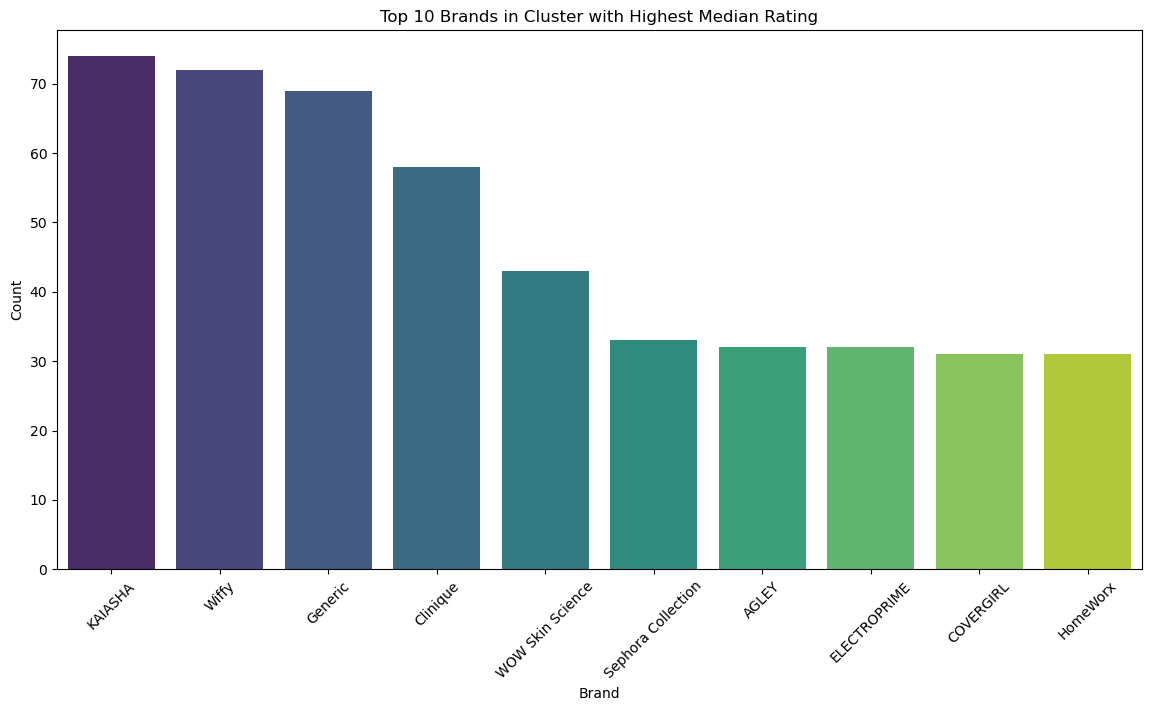

In [37]:
# Calculate the brand distribution for these clusters
brand_distribution_median = high_median_cluster_data['brand'].value_counts().head(10)

# Plot the top 10 brands for the cluster with the highest median rating
plt.figure(figsize=(14, 7))
sns.barplot(x=brand_distribution_median.index, y=brand_distribution_median.values, palette='viridis')
plt.title('Top 10 Brands in Cluster with Highest Median Rating')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
#save the plot
plt.savefig('brands_high_rating.png')
plt.show()

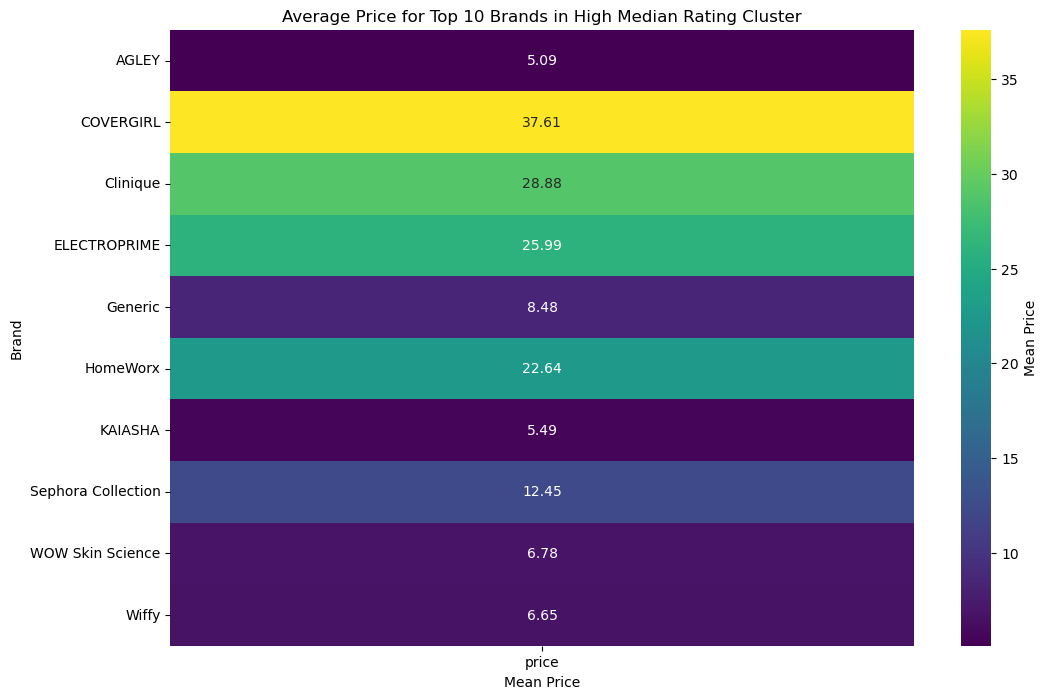

In [38]:
#Find the top 10 brands in this cluster based on the number of products
top_10_brands = highest_median_cluster_data['brand'].value_counts().nlargest(10).index

# Filter the data to include only the top 10 brands
top_10_brands_data = highest_median_cluster_data[highest_median_cluster_data['brand'].isin(top_10_brands)]

# Calculate the mean price for each brand within the top 10 brands
brand_mean_prices = top_10_brands_data.groupby('brand')['price'].mean().reset_index()

# Create a heat map with the brands and their mean prices
plt.figure(figsize=(12, 8))

# Create the heatmap
brand_mean_prices_pivot = brand_mean_prices.pivot_table(index='brand', values='price')
sns.heatmap(brand_mean_prices_pivot, annot=True, fmt=".2f", cmap='viridis', cbar_kws={'label': 'Mean Price'})
plt.title('Average Price for Top 10 Brands in High Median Rating Cluster')
plt.xlabel('Mean Price')
plt.ylabel('Brand')

# Optionally, save the plot
plt.savefig('brand_mean_price_heatmap.png')

plt.show()

### Investigate Cluster Distribution by Subcategory

In [39]:
# Group the data by Cluster and Subcategory to see the distribution.

subcategory_distribution = df.groupby(['Cluster', 'subcategory']).size().unstack().fillna(0)
print(subcategory_distribution)

subcategory  blush  bodywash  cleanser  concealer  conditioner  dry shampoo  \
Cluster                                                                       
blue           0.0       0.0       0.0        1.0          0.0          0.0   
cyan         198.0     360.0      92.0      106.0         18.0         22.0   
dark blue    348.0      49.0       7.0      348.0          0.0         12.0   
dark purple   94.0     184.0     171.0      113.0         43.0         53.0   
green         16.0       6.0      11.0        4.0          0.0          0.0   
purple         0.0       0.0       0.0        1.0          0.0          0.0   
yellow         1.0       0.0       0.0        2.0          0.0          1.0   

subcategory  eye primer  eye treatment  eyebrow  eyelashes  ...    oil  \
Cluster                                                     ...          
blue                0.0            0.0      0.0        0.0  ...    0.0   
cyan                4.0           25.0     20.0        0.0  ...  2

In [40]:
top_subcategories = df.groupby(['Cluster', 'subcategory']).size().groupby(level=0, group_keys=False).nlargest(3).reset_index(name='count')
print(top_subcategories)

        Cluster subcategory  count
0          blue     perfume      3
1          blue    hairmask      2
2          blue     shampoo      2
3          cyan    hairmask    401
4          cyan     shampoo    366
5          cyan    bodywash    360
6     dark blue       blush    348
7     dark blue   concealer    348
8     dark blue   eyeshadow    127
9   dark purple    lipstick    603
10  dark purple       serum    517
11  dark purple   eyeshadow    453
12        green     perfume    713
13        green   eyeshadow    161
14        green       serum    117
15       purple     perfume      7
16       purple        soap      6
17       purple       serum      2
18       yellow     perfume     27
19       yellow        soap     25
20       yellow     shampoo     19


In [41]:
#Analyze the subcategory distribution for the cluster with the highest median rating:

subcategory_distribution_median = high_median_cluster_data['subcategory'].value_counts()
print("Subcategory distribution for cluster with highest median rating:")
print(subcategory_distribution_median)

Subcategory distribution for cluster with highest median rating:
subcategory
hairmask         401
shampoo          366
bodywash         360
mascara          293
perfume          291
serum            287
oil              267
blush            198
lipgloss         179
lipliner         162
eyeshadow        154
lipstick         137
moisturizer      114
lipbalm          109
face wash        108
concealer        106
soap             105
cleanser          92
eyeliner          86
foundation        58
primer            47
mask              38
toner             36
eye treatment     25
dry shampoo       22
spray             21
eyebrow           20
conditioner       18
powder            15
hairstyling       12
lipstain           9
sunscreen          6
eye primer         4
highlighter        1
Name: count, dtype: int64


In [42]:
#Repeat the same for the cluster with the highest mean rating:

subcategory_distribution_mean = high_mean_cluster_data['subcategory'].value_counts()
print("Subcategory distribution for cluster with highest mean rating:")
print(subcategory_distribution_mean)

Subcategory distribution for cluster with highest mean rating:
subcategory
hairmask         401
shampoo          366
bodywash         360
mascara          293
perfume          291
serum            287
oil              267
blush            198
lipgloss         179
lipliner         162
eyeshadow        154
lipstick         137
moisturizer      114
lipbalm          109
face wash        108
concealer        106
soap             105
cleanser          92
eyeliner          86
foundation        58
primer            47
mask              38
toner             36
eye treatment     25
dry shampoo       22
spray             21
eyebrow           20
conditioner       18
powder            15
hairstyling       12
lipstain           9
sunscreen          6
eye primer         4
highlighter        1
Name: count, dtype: int64


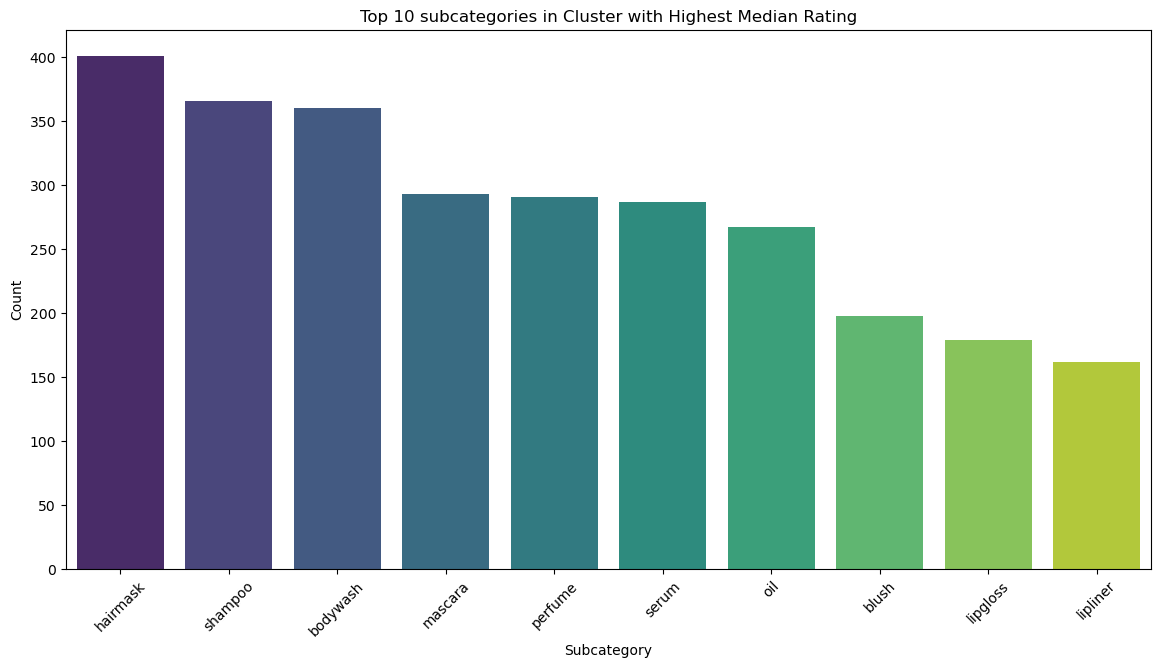

In [45]:
# Calculate the subcategory distribution for these clusters
subcategory_distribution_median = high_median_cluster_data['subcategory'].value_counts().head(10)

# Plot the top 10 subcategories for the cluster with the highest median rating
plt.figure(figsize=(14, 7))
sns.barplot(x=subcategory_distribution_median.index, y=subcategory_distribution_median.values, palette='viridis')
plt.title('Top 10 subcategories in Cluster with Highest Median Rating')
plt.xlabel('Subcategory')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig('subcategorys_high_rating.png')
plt.show()

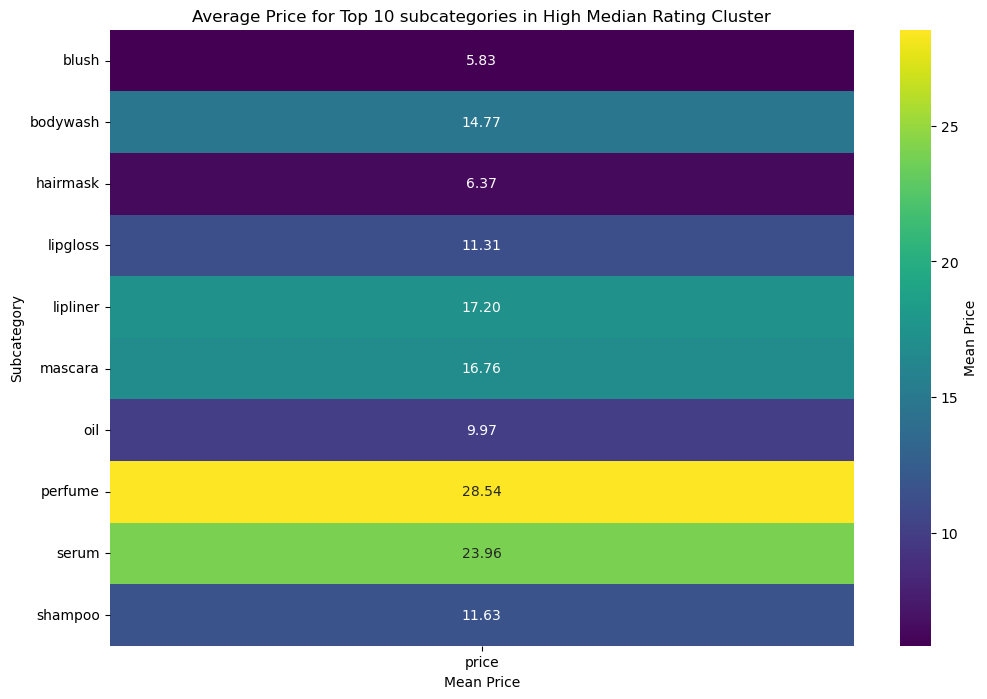

In [46]:
#Find the top 10 subs in this cluster based on the number of products
top_10_subcategory = highest_median_cluster_data['subcategory'].value_counts().nlargest(10).index

# Filter the data to include only the top 10 brands
top_10_subcategory_data = highest_median_cluster_data[highest_median_cluster_data['subcategory'].isin(top_10_subcategory)]

# Calculate the mean price for each subcategory within the top 10 brands
subcategory_mean_prices = top_10_subcategory_data.groupby('subcategory')['price'].mean().reset_index()

# Create a heat map with the subcategories and their mean prices
plt.figure(figsize=(12, 8))

# Create the heatmap
subcategory_mean_prices_pivot = subcategory_mean_prices.pivot_table(index='subcategory', values='price')
sns.heatmap(subcategory_mean_prices_pivot, annot=True, fmt=".2f", cmap='viridis', cbar_kws={'label': 'Mean Price'})
plt.title('Average Price for Top 10 subcategories in High Median Rating Cluster')
plt.xlabel('Mean Price')
plt.ylabel('Subcategory')

# Optionally, save the plot
plt.savefig('subcategory_mean_price_heatmap.png')

plt.show()

### Investigate Cluster Distribution by Website

In [47]:
# Group the data by Cluster and ebsite to see the distribution.

website_distribution = df.groupby(['Cluster', 'website']).size().unstack().fillna(0)
print(website_distribution)

website      Amazon  Flipkart  Sephora    ulta
Cluster                                       
blue            8.0       2.0      3.0     1.0
cyan         2193.0     261.0    103.0  1590.0
dark blue     581.0      19.0    718.0   229.0
dark purple  1571.0     800.0   1749.0  1297.0
green         319.0       3.0    421.0   576.0
purple          1.0      15.0      0.0     0.0
yellow         76.0      65.0      0.0    14.0


In [48]:
top_websites = df.groupby(['Cluster', 'website']).size().groupby(level=0, group_keys=False).nlargest(3).reset_index(name='count')
print(top_websites)

        Cluster   website  count
0          blue    Amazon      8
1          blue   Sephora      3
2          blue  Flipkart      2
3          cyan    Amazon   2193
4          cyan      ulta   1590
5          cyan  Flipkart    261
6     dark blue   Sephora    718
7     dark blue    Amazon    581
8     dark blue      ulta    229
9   dark purple   Sephora   1749
10  dark purple    Amazon   1571
11  dark purple      ulta   1297
12        green      ulta    576
13        green   Sephora    421
14        green    Amazon    319
15       purple  Flipkart     15
16       purple    Amazon      1
17       yellow    Amazon     76
18       yellow  Flipkart     65
19       yellow      ulta     14


In [49]:
#Analyze the subcategory distribution for the cluster with the highest median rating:
website_distribution_median = high_median_cluster_data['website'].value_counts()
print("Website distribution for cluster with highest median rating:")
print(website_distribution_median)

Website distribution for cluster with highest median rating:
website
Amazon      2193
ulta        1590
Flipkart     261
Sephora      103
Name: count, dtype: int64


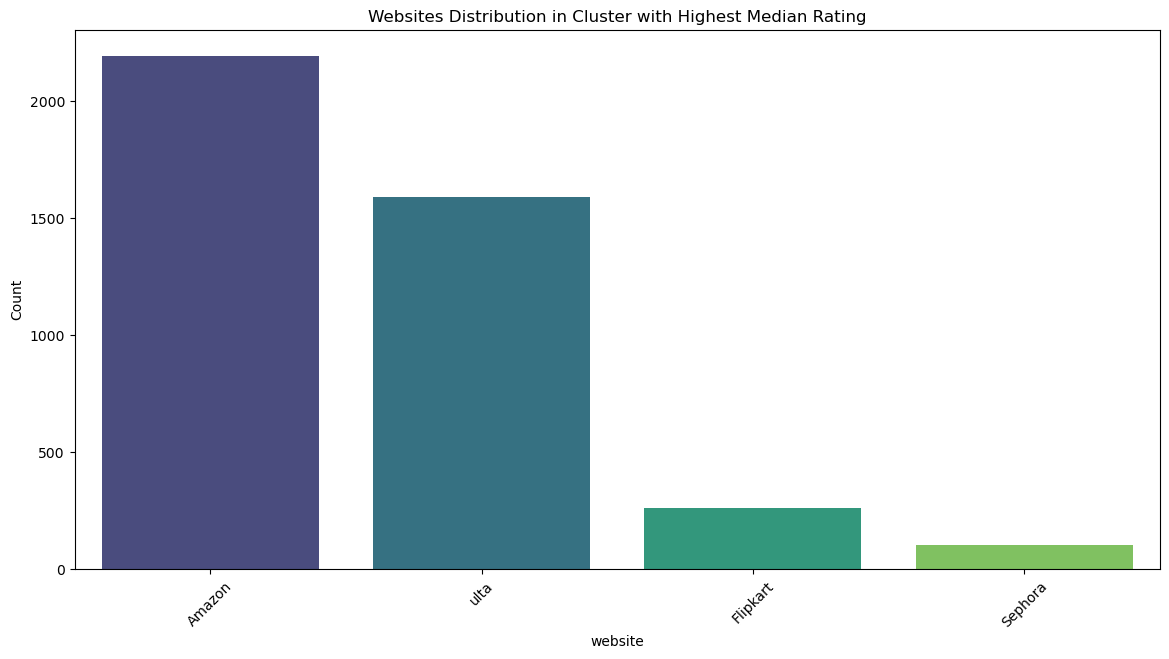

In [50]:
# Plot the website for the cluster with the highest median rating
plt.figure(figsize=(14, 7))
sns.barplot(x=website_distribution_median.index, y=website_distribution_median.values, palette='viridis')
plt.title('Websites Distribution in Cluster with Highest Median Rating')
plt.xlabel('website')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig('websites_rating.png')
plt.show()

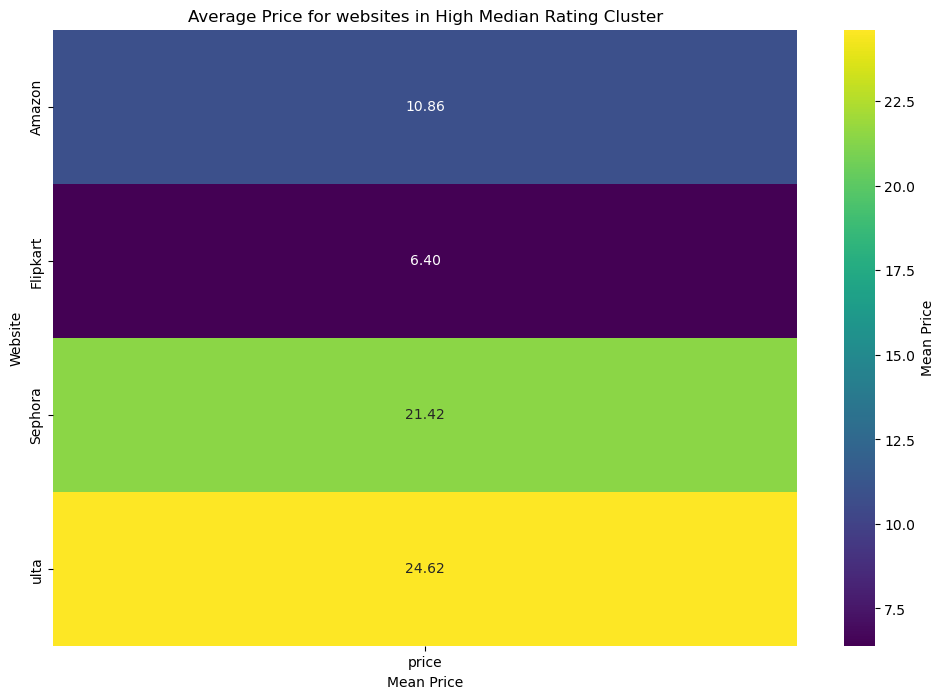

In [51]:
#Calculate the mean price for each website within this cluster
website_mean_prices = highest_median_cluster_data.groupby('website')['price'].mean().reset_index()

# Create a heat map with the website and their mean prices
plt.figure(figsize=(12, 8))

# Create the heatmap
website_mean_prices_pivot = website_mean_prices.pivot_table(index='website', values='price')
sns.heatmap(website_mean_prices_pivot, annot=True, fmt=".2f", cmap='viridis', cbar_kws={'label': 'Mean Price'})
plt.title('Average Price for websites in High Median Rating Cluster')
plt.xlabel('Mean Price')
plt.ylabel('Website')

# save the plot
plt.savefig('website_mean_price_heatmap.png')

plt.show()

In [52]:
# export dataframe:
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'cosmetic_dollar.csv'))